In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss
import random
from tqdm import tqdm
import seaborn as sns

### Function to augment Tabular Data

In [ ]:
def ML_aug(x,limit,num,config='independent'):
  scalers = []
  for s in range(0,limit.shape[0]):                # Fitting Standard Scaler Curve according to the given small dataset, for each feature
    scaler = ss()
    scaler.fit(x[:,s].reshape(-1, 1))
    scalers.append(scaler)
  data_aug = []
  for i in tqdm(range(0,num)):                     # num --> number of augmented datapoints a user want, point ----> single row entry
    point=[]
    for j in range(0,limit.shape[0]):               #  According to fitted Standard Scaler Classes, generating a row entry
      point.append(scalers[j].inverse_transform(random.uniform(scalers[j].transform(limit[j,0].reshape(1, -1)),scalers[j].transform(limit[j,1].reshape(1, -1)))))
    data_aug.append(point)
  return np.array(data_aug)

#Mall Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Features Matrix for which a row entry would be prepared

In [ ]:
x = pd.DataFrame(data = data,columns=['Age','Annual Income (k$)']).to_numpy()
spend = data['Spending Score (1-100)'].to_numpy()

#Generating 400 points with user defining the range of each feature

In [ ]:
user = np.array([[18,70],[15,137]])
print(user.shape)
num = 400
x_n = ML_aug(x,user,num)

100%|██████████| 400/400 [00:00<00:00, 2681.52it/s]

(2, 2)


#Necessary Plots and Graphs

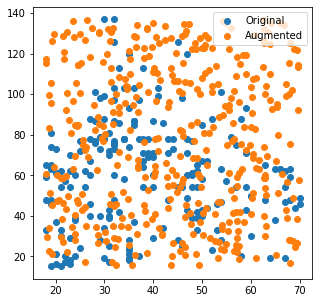

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1],label='Original')
plt.scatter(x_n[:,0],x_n[:,1],label='Augmented')
plt.legend()
plt.show()

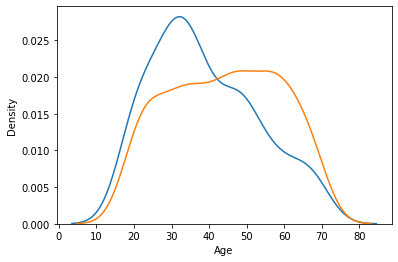

In [ ]:
sns.kdeplot(data['Age'])
sns.kdeplot(data=pd.Series(x_n[:,0].reshape(-1)),legend=False)

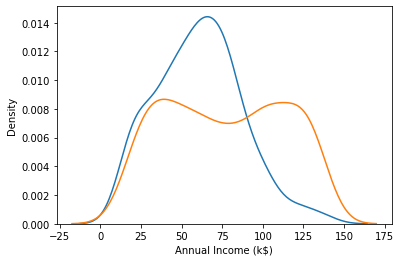

In [ ]:
sns.kdeplot(data['Annual Income (k$)'])
sns.kdeplot(pd.Series(x_n[:,1].reshape(-1)),legend=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


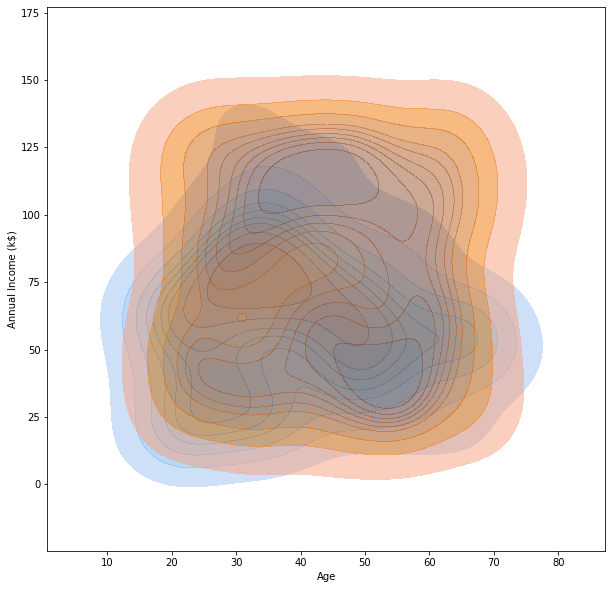

In [ ]:
plt.figure(figsize=(10,10))
sns.kdeplot(data['Age'],data['Annual Income (k$)'],shade=True,alpha=0.5)
sns.kdeplot(x=pd.Series(x_n[:,0].reshape(-1)),y=pd.Series(x_n[:,1].reshape(-1)),shade=True,legend=False,alpha=0.5)